In [32]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

max_epoch_reached = 10
epoch = 10
comparative_live_loss = True
plot_live_training_loss = True
plot_live_time_loss = True
#dir = 
def comparitive_loss_plot(x_list, y_list, legend_label_list, x_label, y_label, title, save_path, plot_or_save):
    for x, y, legend_label in zip(x_list, y_list, legend_label_list):
        plt.plot(x, y, label=legend_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

In [33]:
comparative_loss_titles = ["10K 30s 100n", 
                           "100K 30s 100n", 
                           "500K 30s 100n"
                           ]
comparative_loss_paths = [r'N:\Yr 3 Project Results\RDT 10K 1000ToF timed - Training Results\\',
                          r'N:\Yr 3 Project Results\RDT 100K 1000ToF timed - Training Results\\',
                          r'N:\Yr 3 Project Results\RDT 500K 1000ToF timed - Training Results\\',
                          ] 

In [34]:
if comparative_live_loss:
    comparative_history_da = []
    comparative_epoch_times = []
    for loss_path in comparative_loss_paths:
        #load pkl file into dictionary
        if plot_live_training_loss or plot_live_time_loss:
            with open(loss_path + '\\Raw_Data_Output\\history_da_dict.pkl', 'rb') as f:
                comparative_history_da.append(pickle.load(f))
        if plot_live_time_loss:
            with open(loss_path + '\\Raw_Data_Output\\epoch_times_list_list.csv', 'rb') as f:
                # load the data from the csv file called f into a list 
                comparative_epoch_times.append(np.loadtxt(f, delimiter=',').tolist())


print("Loading data...")
for i in range(0, len(comparative_history_da)):
    print(len(comparative_history_da[i]['train_loss']))
    print(len(comparative_epoch_times[i]))
    print(comparative_epoch_times[i])

Loading data...
469
470
[0.0, 81.19426488876343, 162.68079948425293, 240.55798053741455, 321.0681369304657, 400.25601530075073, 481.78446435928345, 561.5538403987885, 643.8883783817291, 724.2397689819336, 807.0959570407867, 887.8615889549255, 972.0664598941803, 1054.0815765857697, 1138.286327123642, 1219.9233503341675, 1303.9675092697144, 1398.9325182437897, 1489.7058897018433, 1577.2646005153656, 1666.7980539798737, 1751.9202423095703, 1839.8406794071198, 1922.4553055763245, 2007.2254920005798, 2089.273829460144, 2173.4246702194214, 2255.9072608947754, 2340.3044576644897, 2422.8645877838135, 2506.645923614502, 2588.6681497097015, 2673.1869027614594, 2754.934828519821, 2839.57435297966, 2921.6241159439087, 3005.792191028595, 3087.4000601768494, 3171.2925951480865, 3252.9070308208466, 3336.265590906143, 3418.061627626419, 3501.4118778705597, 3583.5771753787994, 3667.9841661453247, 3749.895856142044, 3834.9072937965393, 3916.829682826996, 4001.1444685459137, 4083.4415214061737, 4167.4861

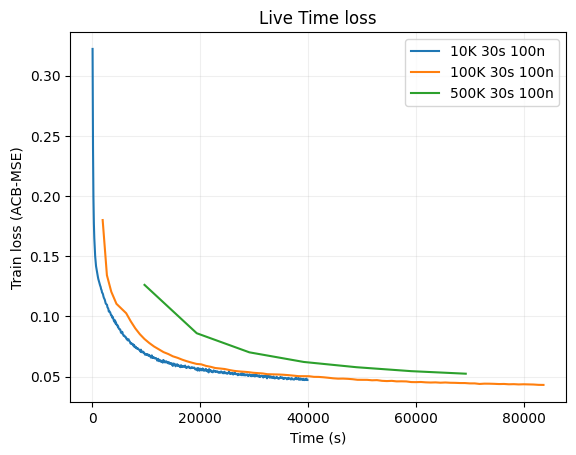

In [35]:

### Live Loss vs time plot
if plot_live_time_loss:
    Out_Label = "Tloss.png"
    
    x_list = []
    y_list = []
    legend_label_list = []

    if comparative_live_loss:
        legend_label_list.extend(comparative_loss_titles)
        
        for loss_dictionary in comparative_history_da:
            if epoch > len(loss_dictionary['train_loss']):
                loss_dictionary['train_loss'].append(np.nan) # protection from surpassing the comaprison data during training. 
            y_list.append(loss_dictionary['train_loss'])

        for epoch_t_list in comparative_epoch_times:
            epoch_t_list = epoch_t_list[1:]
            if epoch > len(epoch_t_list):
                epoch_t_list.append(np.nan) # protection from surpassing the comaprison data during training.
            x_list.append(epoch_t_list)

    comparitive_loss_plot(x_list, y_list, legend_label_list, "Time (s)", "Train loss (ACB-MSE)", "Live Time loss", Out_Label, 1)


